In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread("/content/drive/MyDrive/facenet-pytorch-master/facenet-pytorch-master/data/face_recognition-20241212T202700Z-001/face_recognition/dataset/jenna_ortega/1.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

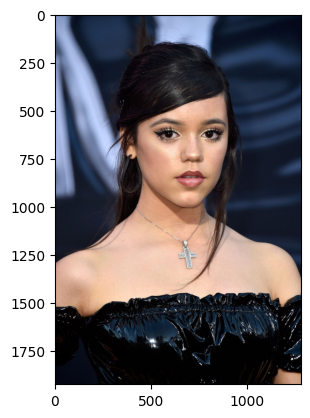

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) #RGB

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

In [ ]:
results

[{'box': [450, 397, 432, 584],
  'confidence': 0.9999008178710938,
  'keypoints': {'nose': [728, 732],
   'mouth_right': [780, 844],
   'right_eye': [803, 623],
   'left_eye': [587, 616],
   'mouth_left': [620, 842]}}]

In [ ]:
x,y,w,h= results[0]['box']

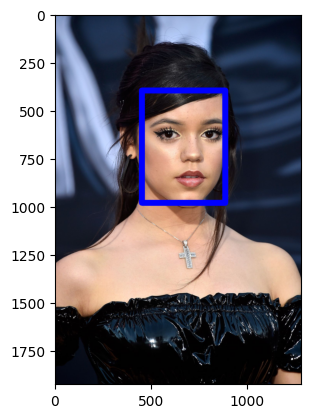

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

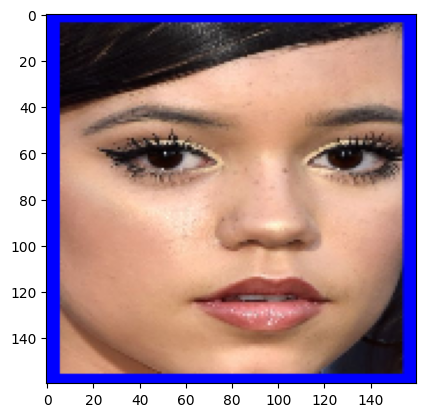

In [ ]:
my_face = img[y: y+h, x:x+w]
#facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
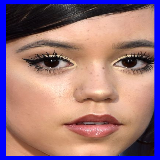

In [ ]:
my_face

In [ ]:
# Automate the preprocessing

In [ ]:
class FACELOADING:
    def __init__(self, directory):
          self.directory = directory
          self.target_size = (160,160)
          self.X = []
          self.Y = []
          self.detector = MTCNN()
    def extract_face(self, filename):
          img = cv.imread(filename)
          img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
          x,y,w,h = self.detector.detect_faces(img)[0]['box']
          x,y = abs(x), abs(y)
          face = img[y:y+h, x:x+w]
          face_arr = cv.resize(face, self.target_size)
          return face_arr

    def load_faces(self, dir):
          FACES = []
          for im_name in os.listdir(dir):
              try:
                  path = dir + im_name
                  single_face = self.extract_face(path)
                  FACES.append(single_face)
              except Exception as e:
                  pass
          return FACES

    def load_classes(self):
          for sub_dir in os.listdir(self.directory):
              path = self.directory +'/'+ sub_dir+'/'
              FACES = self.load_faces(path)
              labels = [sub_dir for _ in range(len(FACES))]
              print(f"Loaded successfully: {len(labels)}")
              self.X.extend(FACES)
              self.Y.extend(labels)
          import numpy as np
          return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
          plt.figure(figsize=(18,16))
          for num,image in enumerate(self.X):
              ncols = 3
              nrows = len(self.Y)//ncols + 1
              plt.subplot(nrows,ncols,num+1)
              plt.imshow(image)
              plt.axis('off')

In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/facenet-pytorch-master/facenet-pytorch-master/data/face_recognition-20241212T202700Z-001/face_recognition/dataset")
X, Y = faceloading.load_classes()

Loaded successfully: 10
Loaded successfully: 9
Loaded successfully: 10
Loaded successfully: 10


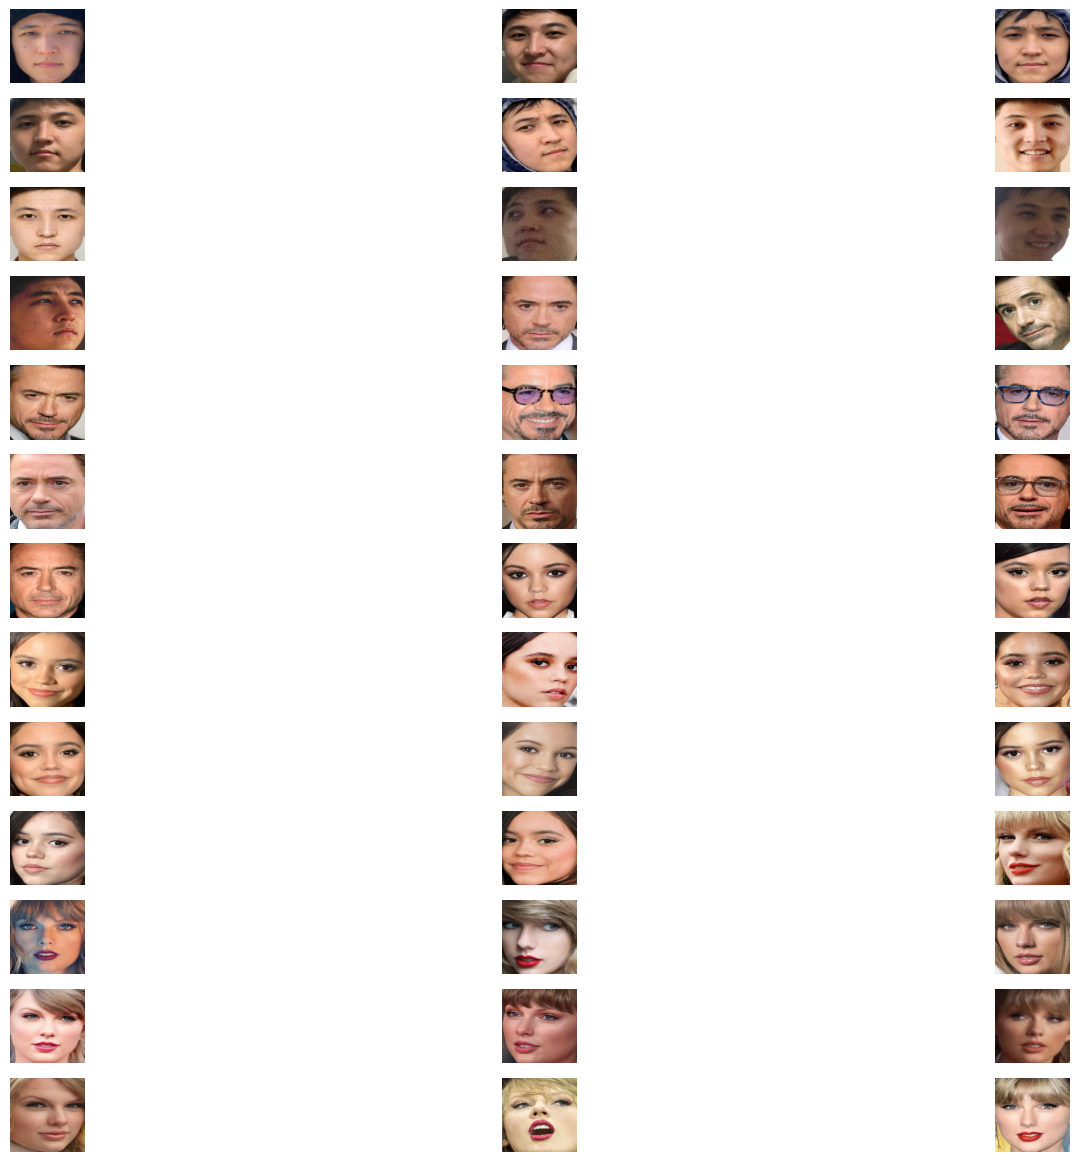

In [ ]:
faceloading.plot_images()

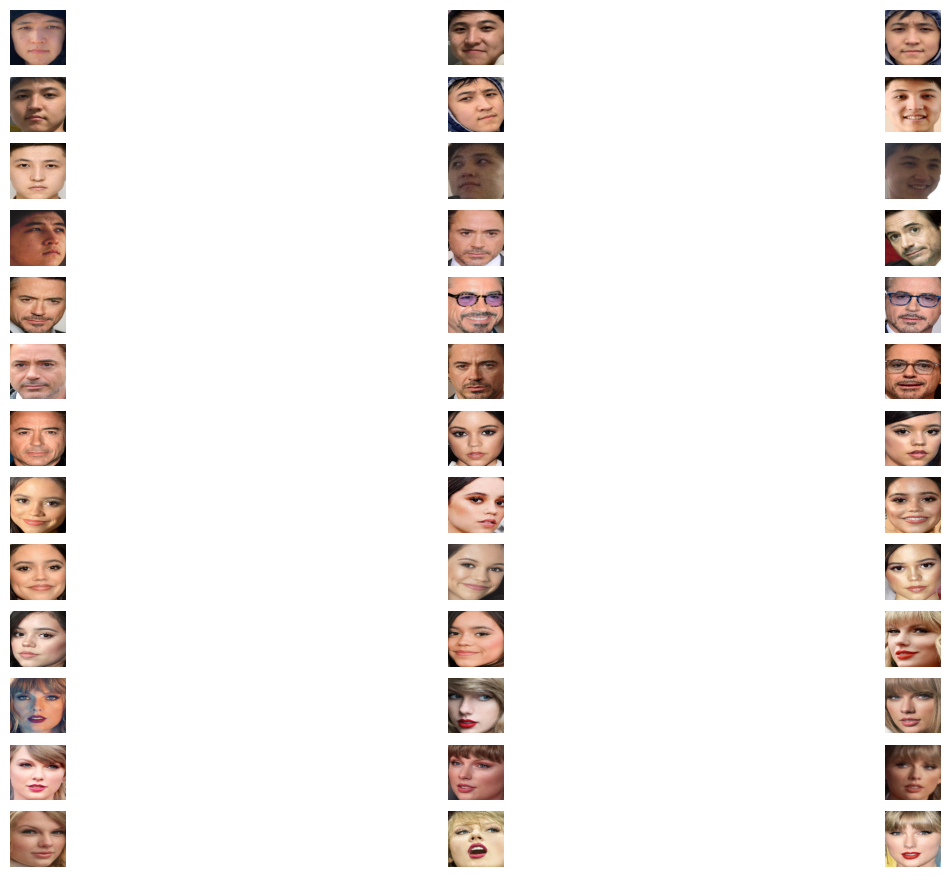

In [ ]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')